<a href="https://colab.research.google.com/github/AshKate98/ANOVA-Testing/blob/main/Copy_of_ANOVAtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing of packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import metrics

#This notebook includes 
1. Anova testing 
2. Post Hoc
3. Logistic Regression 
4. Kurtosis 
5. Shapiro testing

#Breast Cancer Wisconsin diagnostic Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin-data_data.csv to breast-cancer-wisconsin-data_data (3).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer-wisconsin-data_data.csv']))

#Variables for dataframe that can be used for ANOVA testing
1. diagnosis Benign/ Malignant/ NAN/NUll (Unknown) D.V.
2. radius _ mean I.V.
3. area _ mean I.V.
4. radius _ se I.V.
5. area _ se I.V.
6. smoothness _ mean I.V.
7. smoothness _ se I.V.


#Load the dataframe 
dataframe = df

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#3 Countinous variables to be tested with correlation for diagnosis 
1. Radius mean
2. Area mean
3. Smoothness mean

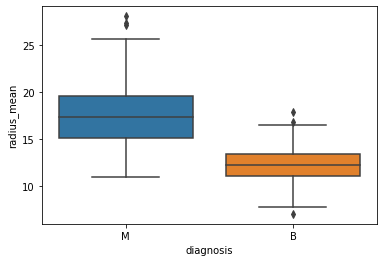

In [ ]:
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = df)

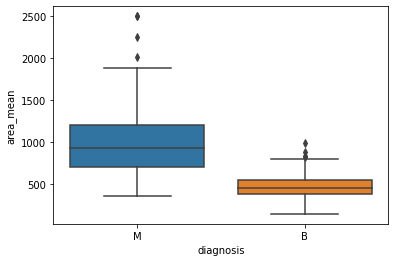

In [ ]:
sns.boxplot(x = 'diagnosis', y = 'area_mean', data = df)

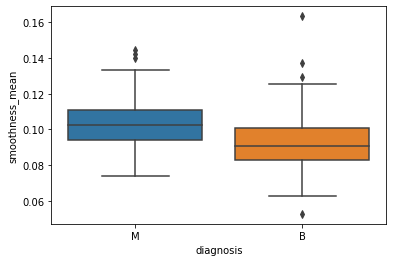

In [ ]:
sns.boxplot(x = 'diagnosis', y = 'smoothness_mean', data = df)

#Assumption Testing

In [ ]:
diagnosis1 = df[df['diagnosis'] == 'B']
diagnosis2 = df[df['diagnosis'] == 'M']
diagnosis3 = df[df['diagnosis'] == 'NULL']

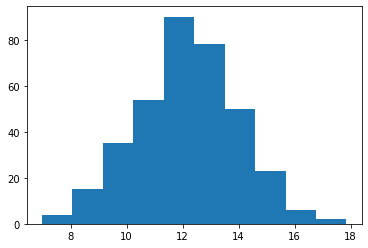

In [ ]:
plt.hist(diagnosis1['radius_mean'])
plt.show()

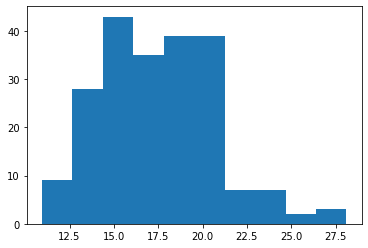

In [ ]:
plt.hist(diagnosis2['radius_mean'])
plt.show()

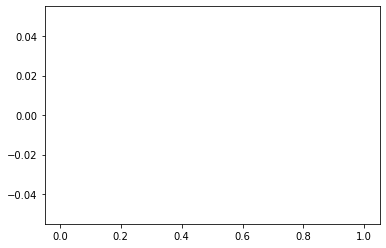

In [ ]:
plt.hist(diagnosis3['radius_mean'])
plt.show()

#Anova Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import statsmodels.api as sm

In [ ]:
model = smf.ols("area_mean ~ C(diagnosis)", data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(diagnosis),3.535855e+07,1.0,573.060747,4.734564e-88
Residual,3.498459e+07,567.0,NaN,NaN


The difference between the area mean and diagnosis is significant due to the P value being less thn 0.05 allowing us to reject the null hypothesis.

In [ ]:
model = smf.ols("radius_mean ~ C(diagnosis)", data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(diagnosis),3759.341799,1.0,646.981021,8.465941e-96
Residual,3294.604835,567.0,NaN,NaN


The difference between the radius mean and diagnosis is significant due to the P value being less thn 0.05 allowing us to reject the null hypothesis.

In [ ]:
model = smf.ols("smoothness_mean ~ C(diagnosis)", data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(diagnosis),0.014444,1.0,83.651123,1.051850e-18
Residual,0.097906,567.0,NaN,NaN


The difference between the smoothness mean and diagnosis is significant due to the P value being less thn 0.05 allowing us to reject the null hypothesis.

#POST_HOC_RES

In [ ]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)

In [ ]:
import statsmodels.stats.multicomp as mc

In [ ]:
comp = mc.MultiComparison(df['diagnosis'], df['radius_mean'])
post_hoc_res = comp.tukeyhsd()
tukey1way = pd.DataFrame(post_hoc_res.summary())

In [ ]:
print(comp)

In [ ]:
print(tukey1way)

             0       1         2      3        4       5       6
0       group1  group2  meandiff  p-adj    lower   upper  reject
1        6.981   7.691       0.0    0.9  -2.4604  2.4604   False
2        6.981   7.729       0.0    0.9  -2.4604  2.4604   False
3        6.981    7.76       0.0    0.9  -2.4604  2.4604   False
4        6.981   8.196       0.0    0.9  -2.4604  2.4604   False
...        ...     ...       ...    ...      ...     ...     ...
103736   25.73   27.42       0.0    0.9  -2.4604  2.4604   False
103737   25.73   28.11       0.0    0.9  -2.4604  2.4604   False
103738   27.22   27.42       0.0    0.9  -2.4604  2.4604   False
103739   27.22   28.11       0.0    0.9  -2.4604  2.4604   False
103740   27.42   28.11       0.0    0.9  -2.4604  2.4604   False

[103741 rows x 7 columns]


Based on the Tukey one way test their was no significant difference between group 1 and group 2 diagnosis and radius_mean.


In [ ]:
comp = mc.MultiComparison(df['diagnosis'], df['area_mean'])
post_hoc_res = comp.tukeyhsd()
tukey1way = pd.DataFrame(post_hoc_res.summary())

In [ ]:
print(comp)

In [ ]:
print(tukey1way)

             0       1         2      3        4       5       6
0       group1  group2  meandiff  p-adj    lower   upper  reject
1        143.5   170.4       0.0    0.9  -2.7693  2.7693   False
2        143.5   178.8       0.0    0.9  -2.7693  2.7693   False
3        143.5   181.0       0.0    0.9  -2.7693  2.7693   False
4        143.5   201.9       0.0    0.9  -2.7693  2.7693   False
...        ...     ...       ...    ...      ...     ...     ...
144987  2010.0  2499.0       0.0    0.9  -2.7693  2.7693   False
144988  2010.0  2501.0       0.0    0.9  -2.7693  2.7693   False
144989  2250.0  2499.0       0.0    0.9  -2.7693  2.7693   False
144990  2250.0  2501.0       0.0    0.9  -2.7693  2.7693   False
144991  2499.0  2501.0       0.0    0.9  -2.7693  2.7693   False

[144992 rows x 7 columns]


Based on the Tukey one way test their was no significant difference between group 1 and group 2 diagnosis and radius_mean.

In [ ]:
comp = mc.MultiComparison(df['diagnosis'], df['smoothness_mean'])
post_hoc_res = comp.tukeyhsd()
tukey1way = pd.DataFrame(post_hoc_res.summary())


In [ ]:
print(comp)

In [ ]:
print(tukey1way)

                           0        1         2      3        4       5       6
0                     group1   group2  meandiff  p-adj    lower   upper  reject
1       0.052629999999999996  0.06251       0.0    0.9  -3.7503  3.7503   False
2       0.052629999999999996  0.06429       0.0    0.9  -3.7503  3.7503   False
3       0.052629999999999996  0.06576       0.0    0.9  -3.7503  3.7503   False
4       0.052629999999999996  0.06613       0.0    0.9  -3.7503  3.7503   False
...                      ...      ...       ...    ...      ...     ...     ...
112097                0.1398   0.1447       0.0    0.9  -3.7503  3.7503   False
112098                0.1398   0.1634      -1.0    0.9  -4.7503  2.7503   False
112099                0.1425   0.1447       0.0    0.9  -3.7503  3.7503   False
112100                0.1425   0.1634      -1.0    0.9  -4.7503  2.7503   False
112101                0.1447   0.1634      -1.0    0.9  -4.7503  2.7503   False

[112102 rows x 7 columns]


Based on the Tukey one way their was no significant differences between group 1 and group 2 diagnosis and smoothness_mean.

In [ ]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#KURTOSIS

# Kurtosis testing
 is used to measure if the data are heavy-tailed or   light-tailed relative to a normal distribution.That is, data sets with high 
 kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis 
 tend to have light tails, or lack of outliers.
 The dataset I used had three categories to be charted for diagnosis such as B, M, or NaN values below the kurtosis histograms for diagnosis 1,2, and 3 are 
show with area_mean. As we can see diagnosis 1 we saw .288 skewness level 
Which shows a low skew and a normal distrubution for benign tumors. Diagnosis  2 showed a skew greater than 1 and -2 at 2.22 meaning that the skew is  non-normal and is too peaked to be considered normal. Diagnosis 3 didnt show any results for missing values with NaN for diagnosis  values so no missing data was found for diagnosis in this dataset.

In [ ]:
from scipy.stats import kurtosis, skew, bartlett

In [ ]:
# kertosis 
print(kurtosis(diagnosis1['area_mean']))
print(kurtosis(diagnosis2['area_mean']))
print(kurtosis(diagnosis3['area_mean']))


0.28842005191069164
2.223843454774964
nan


In [ ]:
print('skew diagnosis1: ', skew(diagnosis1['area_mean']))
print('skew diagnosis2: ', skew(diagnosis2['area_mean']))
print(skew(diagnosis3['area_mean']))

skew diagnosis1:  0.34082567025503224
skew diagnosis2:  1.109744551210065
nan


#Logistic Regression

# Showed DF with mean and Se columns with diagnosis.

In [ ]:
df = df[['diagnosis','radius_mean','area_mean', 'radius_se', 'area_se', 'smoothness_mean','smoothness_se']]

In [ ]:
df.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,1,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,1,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,1,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,1,20.29,1297.0,0.7572,94.44,0.10030,0.011490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int64  
 1   radius_mean      569 non-null    float64
 2   area_mean        569 non-null    float64
 3   radius_se        569 non-null    float64
 4   area_se          569 non-null    float64
 5   smoothness_mean  569 non-null    float64
 6   smoothness_se    569 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


# Boxplot shown below to see the correlation between the 2 variables and the 
# correlation.

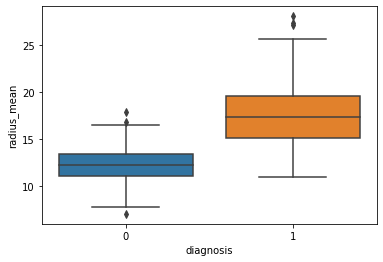

In [ ]:
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = df)

# Check  how well the radius_mean can be utilized to classify, or separate the # datapoints in either B or M diagnosis.
# Selecting a boundary value for the radius mean and see how well it separates the data.
# This will take in a boundary value of our choosing and then classify the data points based on whether they are above or below the boundary.

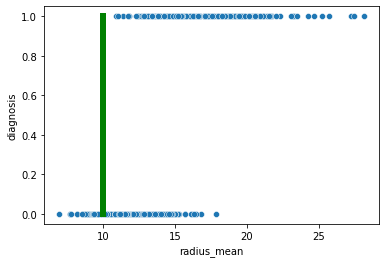

In [ ]:
boundary = 10
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = df)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 6)

Down below I created a function that takes in a target boundary with thevalue of area_mean. 
The number I chose as the boundary was 17 due to the fact that most diagnosis 
for malignant tumors would greater or equal to 17 as the test/predictor model.


In [ ]:
def boundary_classifier(target_boundary,x):
  result = []
  for i in x:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



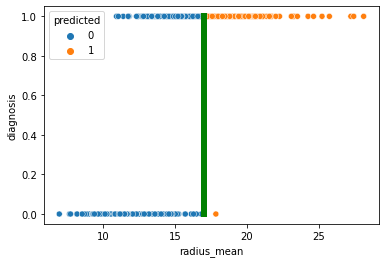

In [ ]:
chosen_boundary = 17
y_pred = boundary_classifier(chosen_boundary, df['radius_mean'])
df['predicted'] = y_pred
y_true = df['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted', data = df)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g', linewidth = 6)

In [ ]:
accuracy = metrics.accuracy_score(y_true,y_pred)
accuracy

0.8312829525483304

The predictor model that I created for this dataset showed a .83 accuracy
score vs. the train model dataset.

#Here I created a subplot showing the Actual diagnosis vs. predicted diagnosis

In [ ]:
y_test = df['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = [0,1]

Text(0.5, 257.44, 'Predicted diagnosis')

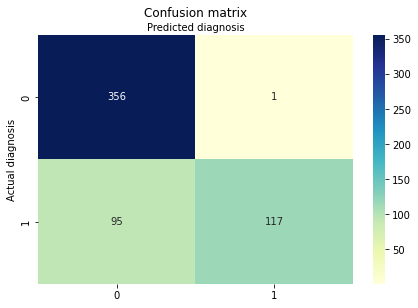

In [ ]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

# Predictor model accuracy, precision, and recall scores for test model vs. 
# Train model.


In [ ]:
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [ ]:
model_stats(y_test, y_pred)

Accuracy:  0.8312829525483304
Precision:  0.9915254237288136
Recall:  0.5518867924528302


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.4, random_state = 1)

In [ ]:
train_df.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
164,1,23.270,1686.0,0.6642,97.85,0.08439,0.004910,1
13,1,15.850,782.7,0.4033,36.58,0.08401,0.009769,0
430,1,14.900,685.0,0.2530,24.19,0.09947,0.006965,0
61,0,8.598,221.8,0.3582,18.39,0.12430,0.011930,0
427,0,10.800,359.9,0.3077,20.20,0.08801,0.006543,0


In [ ]:
test_df.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
421,0,14.69,656.1,0.5462,49.45,0.10310,0.009976,0
47,1,13.17,534.6,0.2871,24.25,0.11580,0.006532,0
292,0,12.95,513.7,0.2094,17.67,0.10050,0.008725,0
186,1,18.31,1041.0,0.2577,28.92,0.08588,0.002866,1
414,1,15.13,719.5,0.4681,45.38,0.08320,0.006831,0


In [ ]:
input_labels = ['radius_mean']
output_label = 'diagnosis'


x_train = train_df[input_labels]
print('Our x variables')
print(x_train.head())
print('\n\n')

y_train = train_df[output_label]
print('Our y variable:')
print(y_train.head())

Our x variables
     radius_mean
164       23.270
13        15.850
430       14.900
61         8.598
427       10.800



Our y variable:
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64


In [ ]:
from sklearn import linear_model
class_rm = linear_model.LogisticRegression()

In [ ]:
class_rm = linear_model.LogisticRegression()
class_rm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_test = test_df[input_labels]
y_test = test_df[input_labels]
y_test = test_df[output_label].values.squeeze()
y_pred = class_rm.predict(x_test)

In [ ]:
print(y_pred)

[1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1]


#Visualization of the results

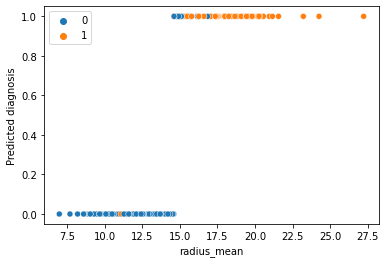

In [ ]:
y_pred = y_pred.squeeze()
x_test_view = x_test[input_labels].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('radius_mean')
plt.ylabel('Predicted diagnosis')
plt.legend()

In [ ]:
model_stats(y_test, y_pred)

Accuracy:  0.8552631578947368
Precision:  0.7831325301204819
Recall:  0.8125


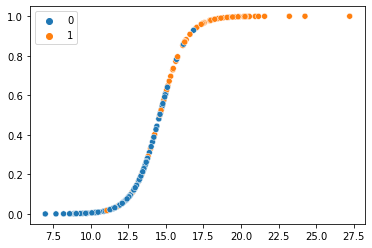

In [ ]:
y_prob = class_rm.predict_proba(x_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)

 This logistic model gives a "line" with curvy ends in the [0,1] range, 
 meaning that is the best approximation for a line that will also always be 
within these boundaries and logistic regression is used for classification 
 problems where in this dataframe we are trying to classify patients tumors.

#Shapiro Test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
import scipy.stats as stats

In [ ]:
model = smf.ols("area_mean ~ C(diagnosis)", data = df).fit()
stats.shapiro(model.resid)

(0.9159478545188904, 3.08260667407033e-17)

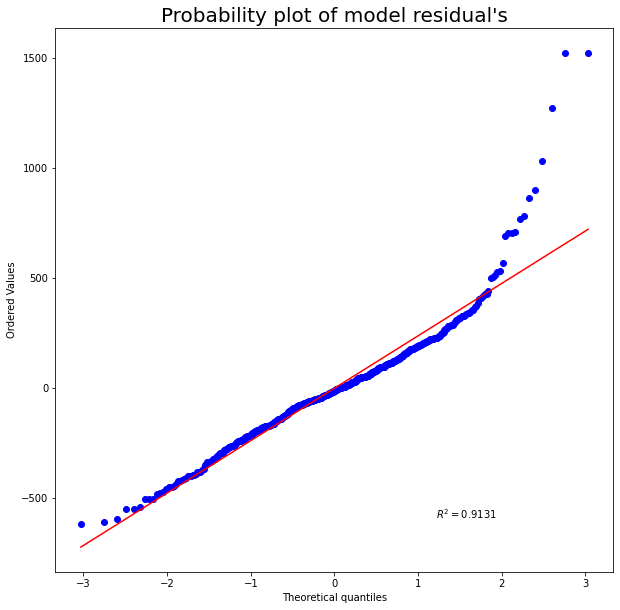

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

 The Shapiro-Wilks test for normality is a normality test
The test rejects the hypothesis of normality when the # p-value is less than 
 or equal to 0.05.
 As shown above the P value is greater than 0.05 meaning that the data is considered normal and we fail to reject the null hypthesis. 